In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
Data_benin = pd.read_csv("../data/benin-malanville.csv")
Data_sierraleone = pd.read_csv("../data/sierraleone-bumbuna.csv")
Data_togo = pd.read_csv("../data/togo-dapaong_qc.csv")

In [4]:
Data_sierraleone.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [5]:
Data_sierraleone.shape

(525600, 19)

In [6]:
Data_sierraleone.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,201.957515,298.495150,-19.5,-2.8,0.3,362.4,1499.0
DNI,525600.0,116.376337,218.652659,-7.8,-0.3,-0.1,107.0,946.0
DHI,525600.0,113.720571,158.946032,-17.9,-3.8,-0.1,224.7,892.0
ModA,525600.0,206.643095,300.896893,0.0,0.0,3.6,359.5,1507.0
ModB,525600.0,198.114691,288.889073,0.0,0.0,3.4,345.4,1473.0
Tamb,525600.0,26.319394,4.398605,12.3,23.1,25.3,29.4,39.9
RH,525600.0,79.448857,20.520775,9.9,68.7,85.4,96.7,100.0
WS,525600.0,1.146113,1.239248,0.0,0.0,0.8,2.0,19.2
WSgust,525600.0,1.691606,1.617053,0.0,0.0,1.6,2.6,23.9
WSstdev,525600.0,0.363823,0.295000,0.0,0.0,0.4,0.6,4.1


In [7]:
# Convert the Timestamp column to datetime format
Data_sierraleone["Timestamp"] = pd.to_datetime(Data_sierraleone["Timestamp"])
df_numeric = Data_sierraleone.drop(columns=['Timestamp'])

In [8]:
# Add additional statistics if needed
summary_stats = Data_sierraleone.describe()
summary_stats.loc['range'] = summary_stats.loc['max'] - summary_stats.loc['min']
summary_stats.loc['median'] = Data_sierraleone.median()
summary_stats.loc['variance'] = df_numeric.var()


print(summary_stats)

                              Timestamp            GHI            DNI  \
count                            525600  525600.000000  525600.000000   
mean      2022-04-30 12:00:30.000000768     201.957515     116.376337   
min                 2021-10-30 00:01:00     -19.500000      -7.800000   
25%                 2022-01-29 06:00:45      -2.800000      -0.300000   
50%                 2022-04-30 12:00:30       0.300000      -0.100000   
75%                 2022-07-30 18:00:15     362.400000     107.000000   
max                 2022-10-30 00:00:00    1499.000000     946.000000   
std                                 NaN     298.495150     218.652659   
range                 364 days 23:59:00    1518.500000     953.800000   
median              2022-04-30 12:00:30       0.300000      -0.100000   
variance                            NaN   89099.354830   47808.985109   

                    DHI           ModA           ModB           Tamb  \
count     525600.000000  525600.000000  525600.0000

# Preprocessor

In [9]:
Data_sierraleone.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [10]:
# check missing value
# threshold = len(Data_benin) * 0.5
# Data_benin = Data_benin.dropna(axis=1,thresh = threshold)
Data_sierraleone.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [11]:
# if we have null value
#Data_sierraleone.drop(columns=[Data_sierraleone.columns[-1]],inplace = True)
threshold = len(Data_sierraleone) * 0.5
Data_sierraleone = Data_sierraleone.dropna(axis=1,thresh = threshold)

In [12]:
# Detected Outliers 
Q1 = Data_sierraleone.quantile(0.25)
Q3 = Data_sierraleone.quantile(0.75)
IQR = Q3 - Q1
print(type(IQR))

# Outliers are values outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
outliers = ((Data_sierraleone < (Q1 - 1.5 * IQR)) | (Data_sierraleone > (Q3 + 1.5 * IQR)))

print("\nOutliers Detected:\n", outliers.sum())

<class 'pandas.core.series.Series'>

Outliers Detected:
 Timestamp             0
GHI               15853
DNI              101688
DHI                4407
ModA              21017
ModB              20613
Tamb                652
RH                11865
WS                 3169
WSgust             3665
WSstdev             812
WD                    0
WDstdev            4918
BP                17264
Cleaning            508
Precipitation     12069
TModA               772
TModB                 9
dtype: int64


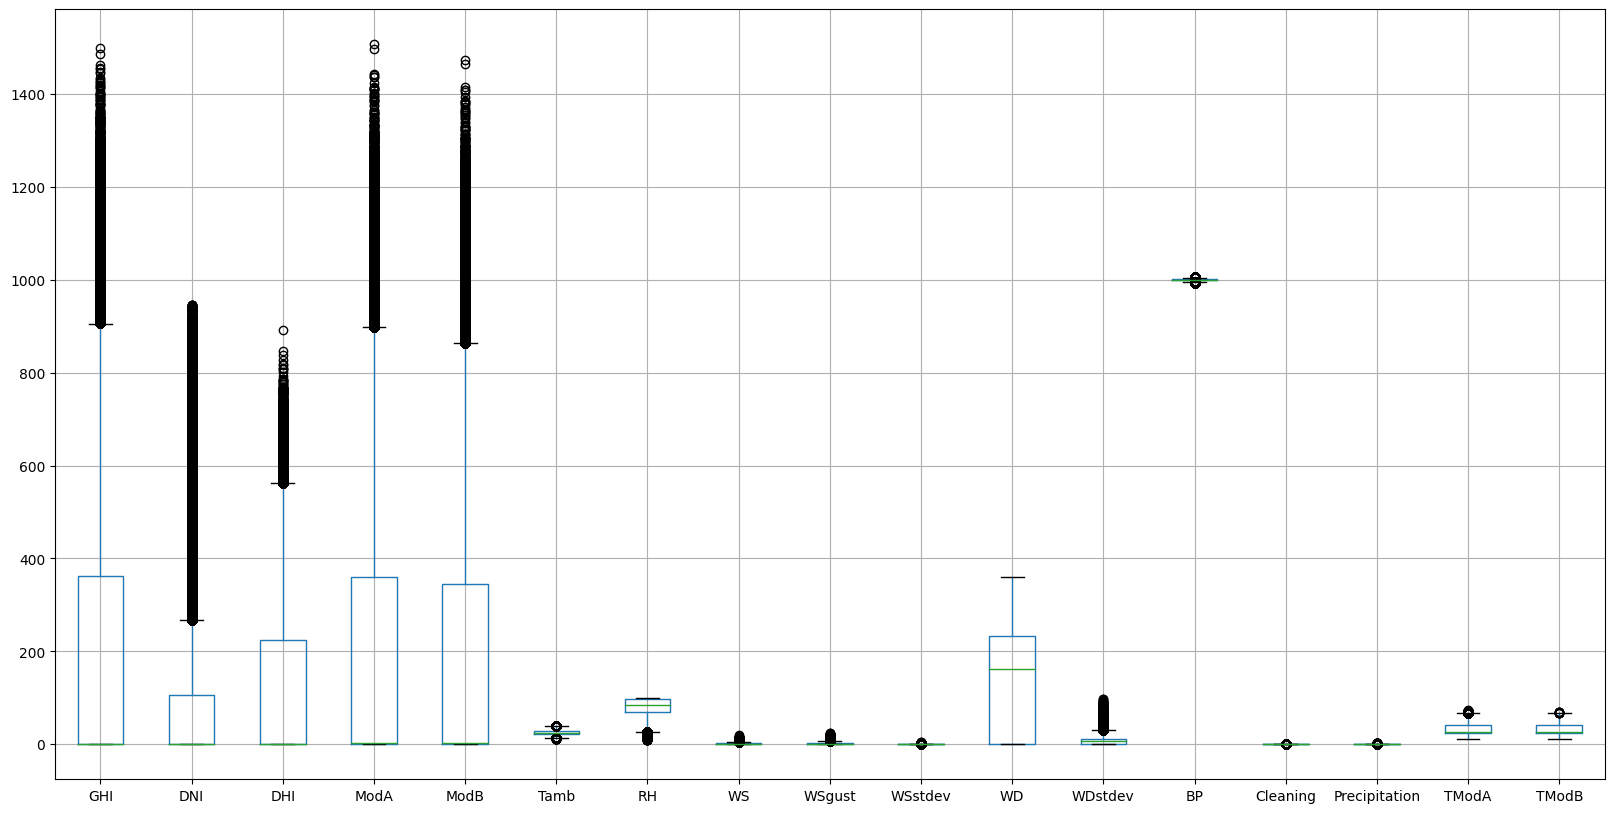

In [31]:
#Identifying Outliers with Box Plots
Data_sierraleone.boxplot(figsize=(20, 10))
plt.show()

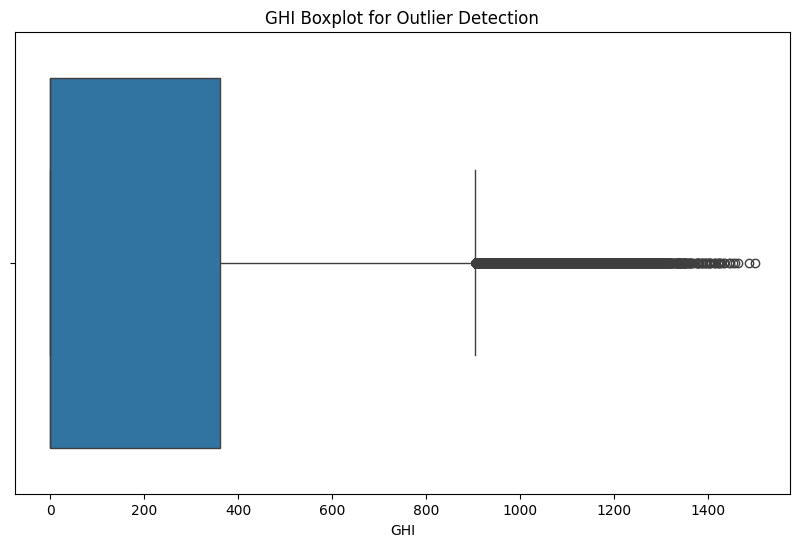

In [32]:
# Boxplot for GHI to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=Data_sierraleone['GHI'])
plt.title('GHI Boxplot for Outlier Detection')
plt.show()

In [13]:
# Checking for negative values in GHI, DNI, DHI (should not have negatives)
incorrect_entries = (Data_sierraleone[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']] < 0).sum()
print("\nIncorrect Entries (Negative Values):\n", incorrect_entries)
# Example of flagging suspicious entries in GHI
suspicious_entries_ghi = Data_sierraleone[(Data_sierraleone['GHI'] > 1400) | (Data_sierraleone['GHI'] < 0)]  # GHI generally should be between 0 and 1400 W/m²
print("\nSuspicious GHI Entries:\n", suspicious_entries_ghi)


Incorrect Entries (Negative Values):
 GHI       261135
DNI       266352
DHI       263128
ModA           0
ModB           0
WS             0
WSgust         0
dtype: int64

Suspicious GHI Entries:
                  Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  \
0      2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0   
1      2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0   
2      2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0   
3      2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0   
4      2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0   
...                    ...  ...  ...  ...   ...   ...   ...    ...  ...   
525595 2022-10-29 23:56:00 -1.6 -0.1 -2.9   0.0   0.0  24.0  100.0  0.0   
525596 2022-10-29 23:57:00 -1.7 -0.1 -3.0   0.0   0.0  24.0  100.0  0.0   
525597 2022-10-29 23:58:00 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0   
525598 2022-10-29 23:59:00 -1.7 -0.2 -3.3   0.0   0.0

In [14]:
# Replace negative values with 0
columns_to_correct = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
Data_sierraleone[columns_to_correct] = Data_sierraleone[columns_to_correct].applymap(lambda x: max(x, 0))

In [15]:
# Checking for negative values in GHI, DNI, DHI (should not have negatives)
incorrect_entries = (Data_sierraleone[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']] < 0).sum()
print("\nIncorrect Entries (Negative Values):\n", incorrect_entries)


Incorrect Entries (Negative Values):
 GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


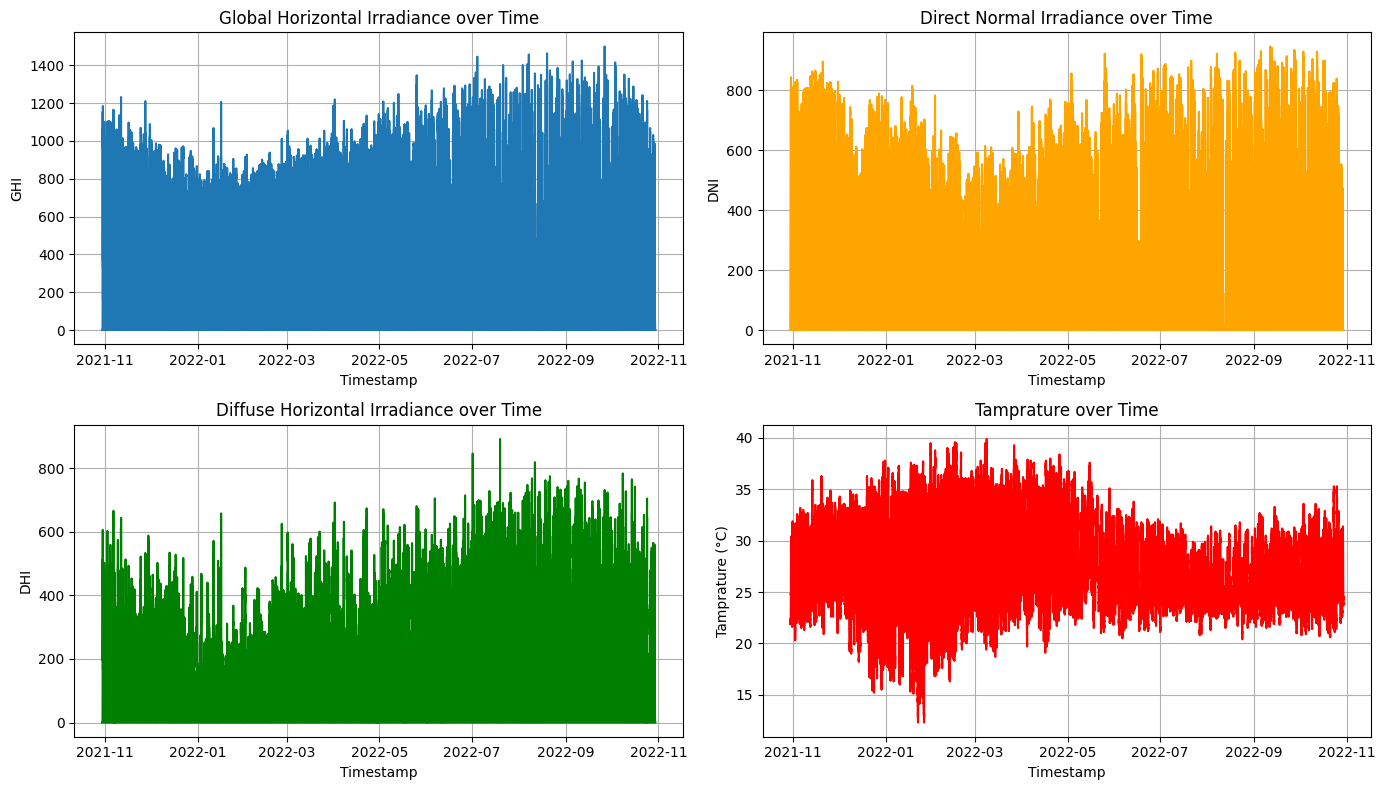

In [16]:
# Plot line graphs for GHI, DNI, DHI, and Tamb
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(Data_sierraleone['Timestamp'], Data_sierraleone['GHI'], label='GHI')
plt.title('Global Horizontal Irradiance over Time')
plt.xlabel('Timestamp')
plt.ylabel('GHI')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Data_sierraleone['Timestamp'], Data_sierraleone['DNI'], label='DNI', color='orange')
plt.title('Direct Normal Irradiance over Time')
plt.xlabel('Timestamp')
plt.ylabel('DNI')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Data_sierraleone['Timestamp'], Data_sierraleone['DHI'], label='DHI', color='green')
plt.title('Diffuse Horizontal Irradiance over Time')
plt.xlabel('Timestamp')
plt.ylabel('DHI')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Data_sierraleone['Timestamp'], Data_sierraleone['Tamb'], label='Tamb', color='red')
plt.title('Tamprature over Time')
plt.xlabel('Timestamp')
plt.ylabel('Tamprature (°C)')
plt.grid(True)

plt.tight_layout()
plt.show()


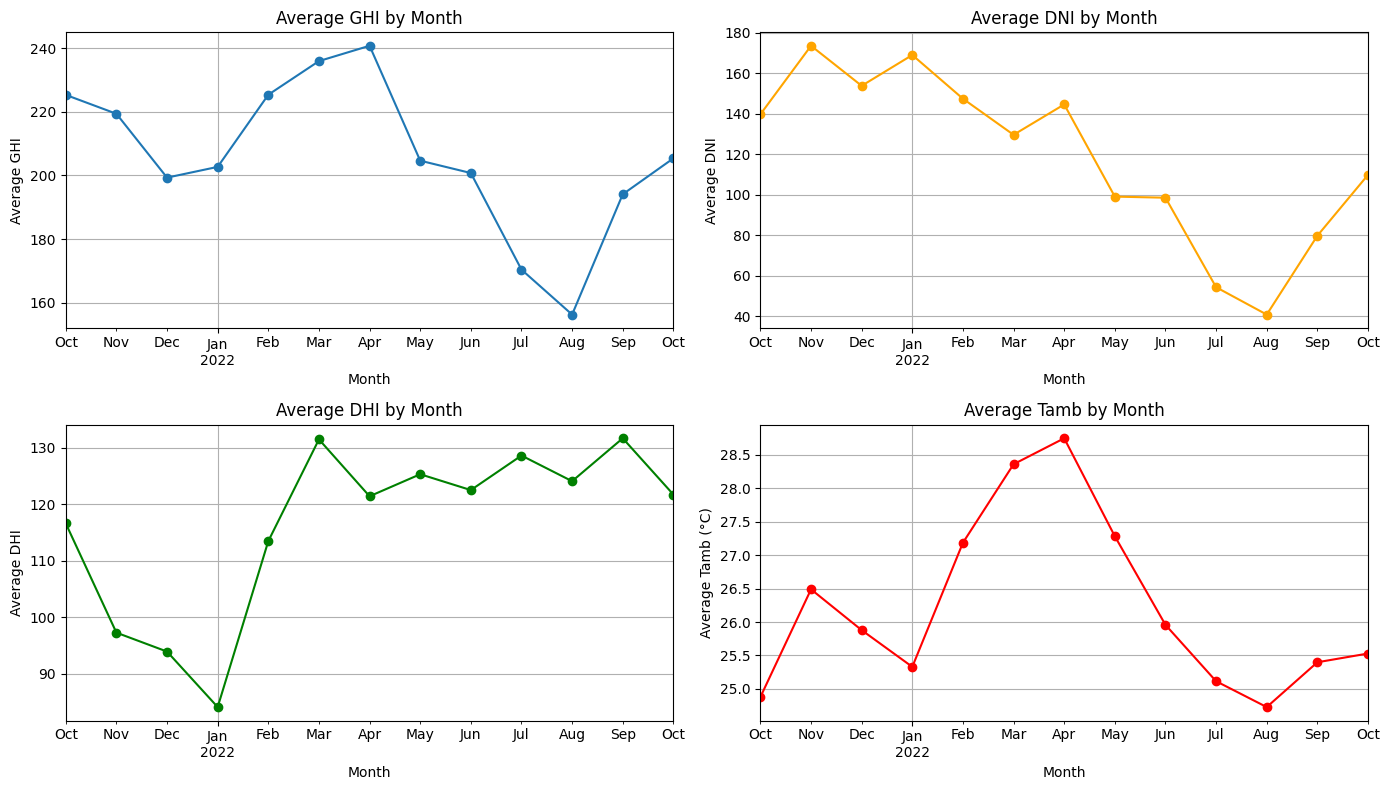

In [18]:
# Extract month and year for grouping
Data_sierraleone['YearMonth'] = Data_sierraleone['Timestamp'].dt.to_period('M')

# Group by YearMonth and calculate mean for each group
monthly_means = Data_sierraleone.groupby('YearMonth').mean()

# Plot the monthly means
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
monthly_means['GHI'].plot(kind='line', marker='o')
plt.title('Average GHI by Month')
plt.xlabel('Month')
plt.ylabel('Average GHI')
plt.grid(True)

plt.subplot(2, 2, 2)
monthly_means['DNI'].plot(kind='line', marker='o', color='orange')
plt.title('Average DNI by Month')
plt.xlabel('Month')
plt.ylabel('Average DNI')
plt.grid(True)

plt.subplot(2, 2, 3)
monthly_means['DHI'].plot(kind='line', marker='o', color='green')
plt.title('Average DHI by Month')
plt.xlabel('Month')
plt.ylabel('Average DHI')
plt.grid(True)

plt.subplot(2, 2, 4)
monthly_means['Tamb'].plot(kind='line', marker='o', color='red')
plt.title('Average Tamb by Month')
plt.xlabel('Month')
plt.ylabel('Average Tamb (°C)')
plt.grid(True)

plt.tight_layout()
plt.show()

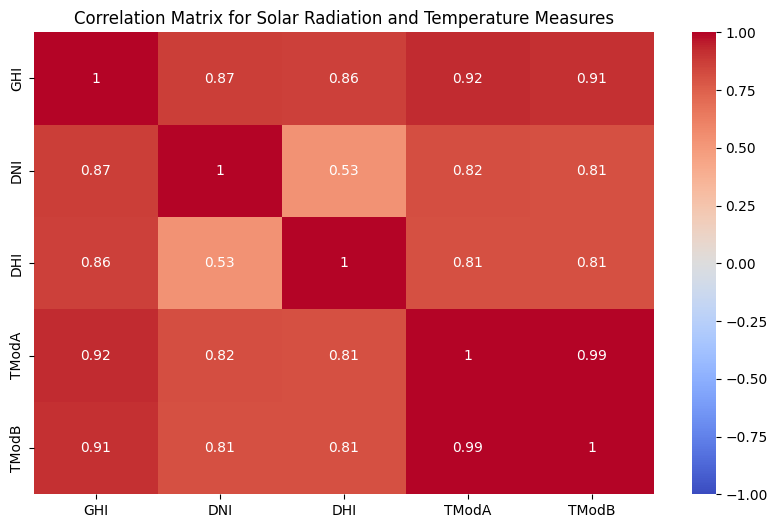

In [20]:
# Select the relevant columns for the correlation matrix
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Calculate the correlation matrix
corr_matrix = Data_sierraleone[corr_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Solar Radiation and Temperature Measures')
plt.show()

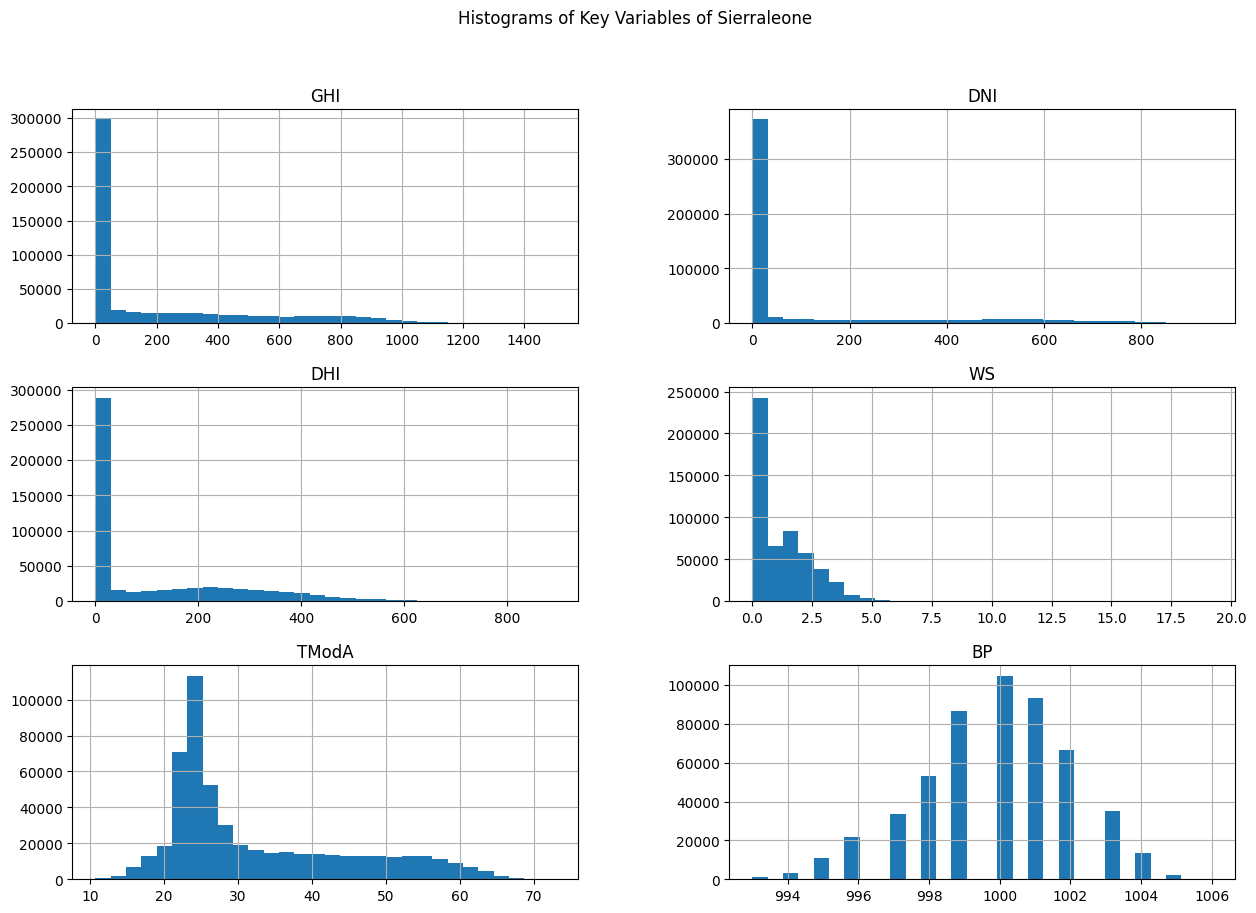

In [28]:
# Histograms for GHI, DNI, DHI, WS, TModA
variables = ['GHI', 'DNI', 'DHI', 'WS', 'TModA',"BP"]
Data_sierraleone[variables].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Key Variables of Sierraleone')
plt.show()

In [ ]:
# Plot pair plot
sns.pairplot(Data_sierraleone[corr_columns], kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Pair Plot for Solar Radiation and Temperature Measures', y=1.02)
plt.show()

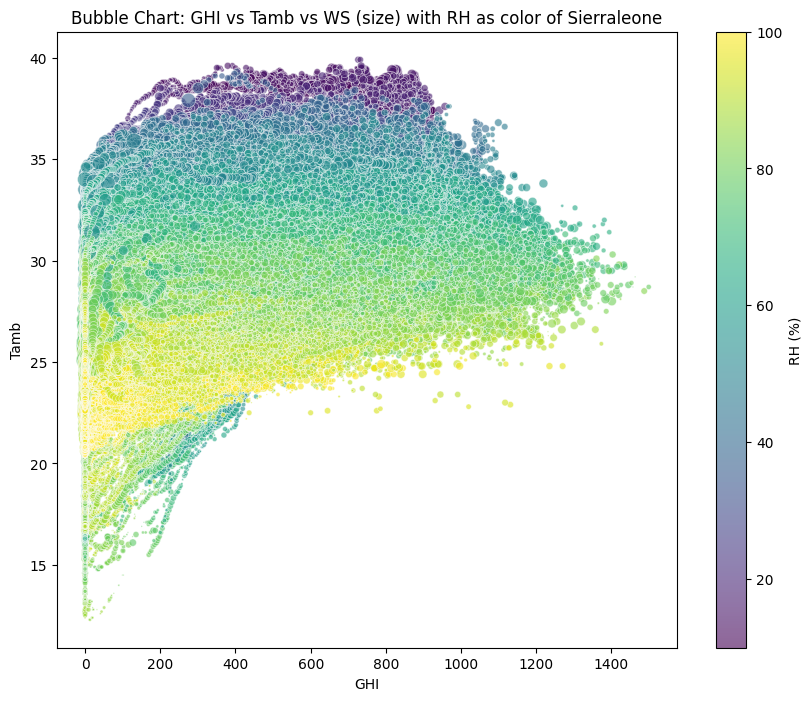

In [30]:
# Bubble chart: GHI vs Tamb vs WS (size) with RH as color
plt.figure(figsize=(10, 8))
plt.scatter(Data_sierraleone['GHI'], Data_sierraleone['Tamb'], s=Data_sierraleone['WS']*10, c=Data_sierraleone['RH'], cmap='viridis', alpha=0.6, edgecolor='w', linewidth=0.5)
plt.title('Bubble Chart: GHI vs Tamb vs WS (size) with RH as color of Sierraleone')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.colorbar(label='RH (%)')

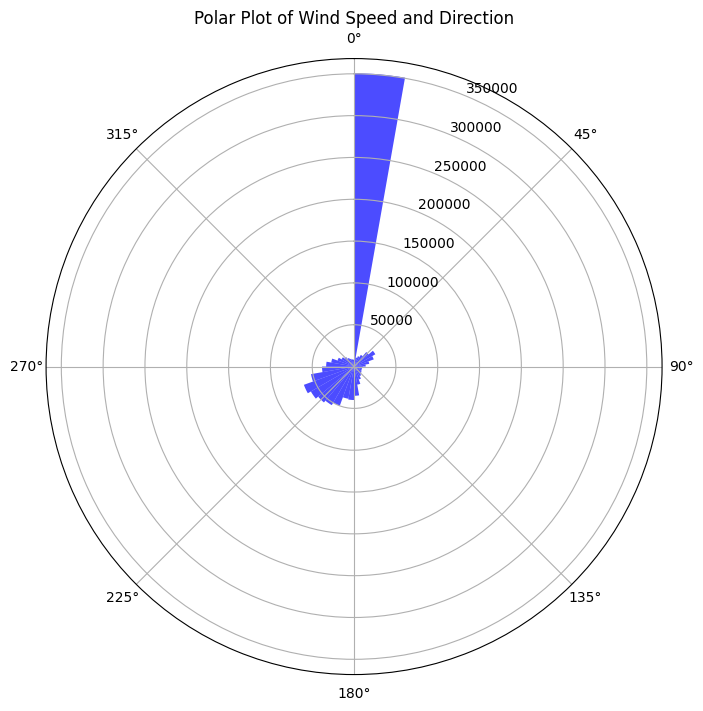

In [33]:
# Polar plot for wind direction and speed
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
ax.hist(Data_sierraleone['WD'].dropna().apply(np.deg2rad), bins=36, weights=Data_togo['WS'].dropna(), color='blue', alpha=0.7)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2)
ax.set_title('Polar Plot of Wind Speed and Direction')
plt.show()